In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint, solve_ivp
from matplotlib import animation
from IPython.display import HTML

In [2]:
class LagrangianDoublePendulum3():

    def __init__(self, L=1., m=1., g=1.
                ):
        self.L = L
        self.m = m
        self.g = g

    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        t : time 
        y : A 4-component vector with y[0] = phi_1(t) and y[1] = dphi_1/dt
                                      y[2] = phi_2(t) and y[3] = dphi_2/dt
                                      y[4] = phi_3(t) and y[5] = dphi_3/dt
        """      
        dy = np.zeros(6)
        dy[0] = y[1]
        dy[1] = (3 * self.L)**(-1) * (-3 * self.g * np.sin(y[0]) - 2 * self.L * np.sin(y[0] - y[2]) * y[3]**2 - self.L * np.sin(y[0] - y[4]) * y[5]**2 - 2 * self.L * np.cos(y[0] - y[2]) * dy[3] - self.L * np.cos(y[0] - y[4]) * dy[5])
        dy[2] = y[3]
        dy[3] = (2 * self.L)**(-1) * (-2 * self.g * np.sin(y[2]) + 2 * self.L * np.sin(y[0] - y[2]) * y[1]**2 - self.L * np.sin(y[2] - y[4]) * y[5]**2 - 2 * self.L * np.cos(y[0] - y[2]) * dy[1] - self.L * np.cos(y[2] - y[4]) * dy[5])
        dy[4] = y[5]
        dy[5] = (self.L)**(-1) * (- self.g * np.sin(y[4]) +  self.L * np.sin(y[0] - y[4]) * y[1]**2 - self.L * np.sin(y[2] - y[4]) * y[3]**2 -  self.L * np.cos(y[0] - y[4]) * dy[1] - self.L * np.cos(y[2] - y[4]) * dy[3])
      
        return dy
    
    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, phi3_0, phi3_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, phi3_0, phi3_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi1_dot, phi_2, phi2_dot, phi_3, phi3_dot   = solution.y

        return phi_1, phi1_dot, phi_2, phi2_dot, phi_3, phi3_dot

In [125]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 60.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L = 1.
g = 1.
m = 1.

# Instantiate a pendulum 
p2 = LagrangianDoublePendulum3(L=L,m=m,g=g)

In [126]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [127]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [128]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

(<AxesSubplot:title={'center':'total KE - t space'}, xlabel='$\\phi$', ylabel='$d\\phi/dt$'>,
 <matplotlib.lines.Line2D at 0x16a8d8ee0>)

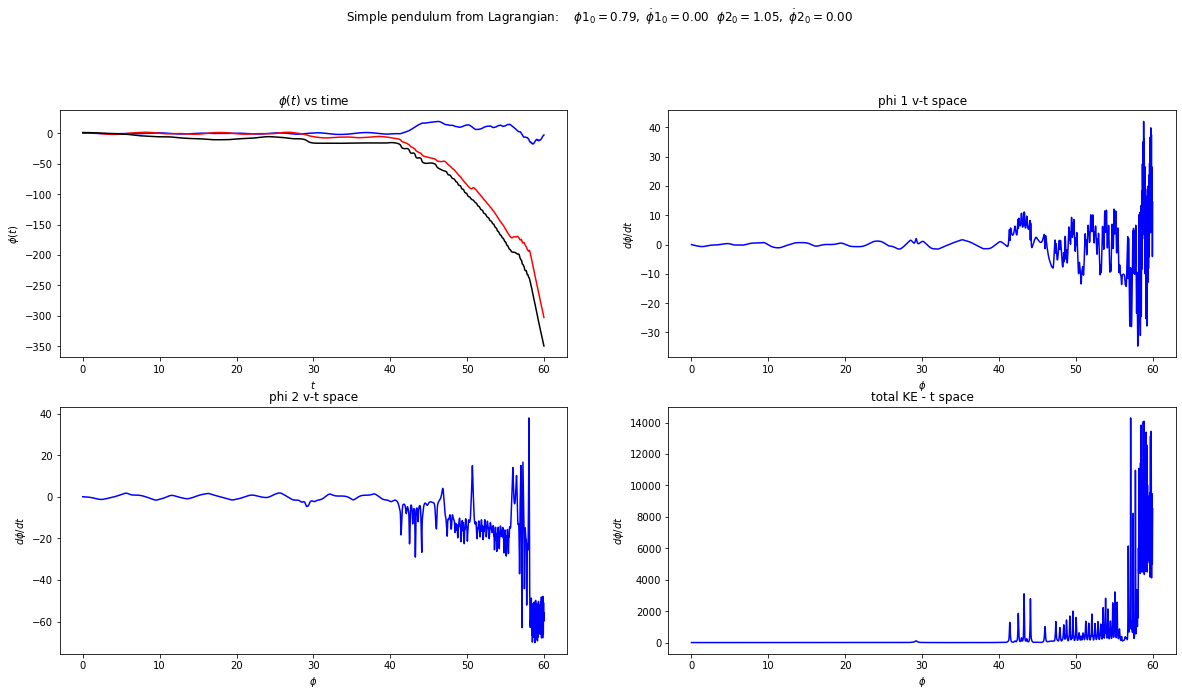

In [130]:
# both plots: same initial conditions
phi1_0 = np.pi/4
phi1_dot_0 = 0.

phi2_0 = np.pi/3
phi2_dot_0 = 0.

phi3_0 = np.pi/2
phi3_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot,phi3, phi3_dot = p2.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, phi3_0, phi3_dot_0)
 
# start the plot!
fig = plt.figure(figsize=(20,10))
overall_title = 'Simple pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                rf'  $\phi2_0 = {phi2_0:.2f},$' + \
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(2,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi(t)$ vs time', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\phi(t)$ vs time', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], phi3[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='black',
            label=None, 
            title=r'$\phi(t)$ vs time', 
            ax=ax_a)    

ax_a = fig.add_subplot(2,2,2) 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='phi 1 v-t space', 
            ax=ax_a)  

ax_a = fig.add_subplot(2,2,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi2_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='phi 2 v-t space', 
            ax=ax_a)  

ax_a = fig.add_subplot(2,2,4) 
start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], (phi3_dot[start : stop])**2 + (phi2_dot[start : stop])**2 + (phi1_dot[start : stop])**2, 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='total KE - t space', 
            ax=ax_a)  

In [131]:
x1 = L*np.sin(phi1)      
y1 = -L*np.cos(phi1)
x2 = L*np.sin(phi2)+x1
y2 = y1-L*np.cos(phi2)
x3 = L*np.sin(phi3)+x2
y3 = y2 - L*np.cos(phi3)
print(len(x1), len(t_pts))
print(len(x2), len(t_pts))
print(len(x3), len(t_pts))
print(len(y1), len(t_pts))
# these are x,y coordinates of pendulum

6001 6001
6001 6001
6001 6001
6001 6001


In [132]:
%%capture

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-3, 3), ylim=(-3, 3))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def anim(i):
    iskip = 6*i
    
    thisx = [0,x1[iskip], x2[iskip],x3[iskip]]
    thisy = [0,y1[iskip], y2[iskip],y3[iskip]]
    
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (iskip*delta_t))
    return line, time_text

In [85]:
# anim = animation.FuncAnimation(fig, anim, np.arange(1, len(t_pts)),
#     interval=25, blit=True, init_func=init)

frame_interval = 1.  # time between frames
frame_number = 1001   # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig, 
                               anim, 
                               init_func=init,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [86]:
HTML(anim.to_jshtml())  # animate using javascript